# Preliminary analysis MUSE output 

In [2]:
%load_ext nb_black
%matplotlib notebook

<IPython.core.display.Javascript object>

### Import modules 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np
from glob import glob
import os

<IPython.core.display.Javascript object>

### Read in all data

In [87]:
class muse_results:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path

    def read_in_data(self):

        self.capacity_results = pd.read_csv(
            os.path.join(self.path, "Results/MCACapacity.csv")
        )

        # sort by year
        self.capacity_results = self.capacity_results.sort_values(by="year")

        self.metric_supply_results = pd.read_csv(
            os.path.join(self.path, "Results/MCAMetric_Supply.csv")
        )

        # drop unused column
        self.metric_supply_results = self.metric_supply_results.drop(
            columns="Unnamed: 0"
        )

<IPython.core.display.Javascript object>

In [173]:
path_to_data = "/../../.."

# initialise dictionary
scenarios = {}

# get all scenarios available
list_of_directories = glob(f"{path_to_data}/*")

# loop over all directories
for directory in list_of_directories:
    name_scenario = directory.split("../")[-1]
    results = muse_results(name=name_scenario, path=directory)
    results.read_in_data()
    scenarios[name_scenario] = results

<IPython.core.display.Javascript object>

### Check the technology categories

In [156]:
scenarios["Moderate_0"].capacity_results.technology.unique().tolist()

['Biomass Power Plant',
 'Geothermal Power Plant',
 'Large Hydropower Plant (Dam) (>100MW)',
 'Light Fuel Oil Power Plant',
 'Medium Hydropower Plant (10-100MW)',
 'Oil Fired Gas Turbine (SCGT)',
 'Onshore Wind',
 'Solar PV (Distributed with Storage)',
 'Solar PV (Utility)']

<IPython.core.display.Javascript object>

In [157]:
results.capacity_results.sort_values(by="year")

,technology,dst_region,region,agent,sector,type,year,capacity
0,Biomass Power Plant,Kenya,Kenya,A1,power,retrofit,2020,2.8382
1,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2020,13.2136
2,Large Hydropower Plant (Dam) (>100MW),Kenya,Kenya,A1,power,retrofit,2020,15.7365
3,Light Fuel Oil Power Plant,Kenya,Kenya,A1,power,retrofit,2020,9.0666
4,Medium Hydropower Plant (10-100MW),Kenya,Kenya,A1,power,retrofit,2020,7.8462
...,...,...,...,...,...,...,...,...
74,Oil Fired Gas Turbine (SCGT),Kenya,Kenya,A1,power,retrofit,2050,1.6584
75,Onshore Wind,Kenya,Kenya,A1,power,retrofit,2050,1.1502
69,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2050,103.5469
70,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2050,160.0714


<IPython.core.display.Javascript object>

### Settings for the charts

In [82]:
params = {
    "axes.labelsize": 15,
    "axes.titlesize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
}
hfont = {"fontname": "Helvetica"}
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams.update(params)

<IPython.core.display.Javascript object>

## Graphical solution

<IPython.core.display.Javascript object>


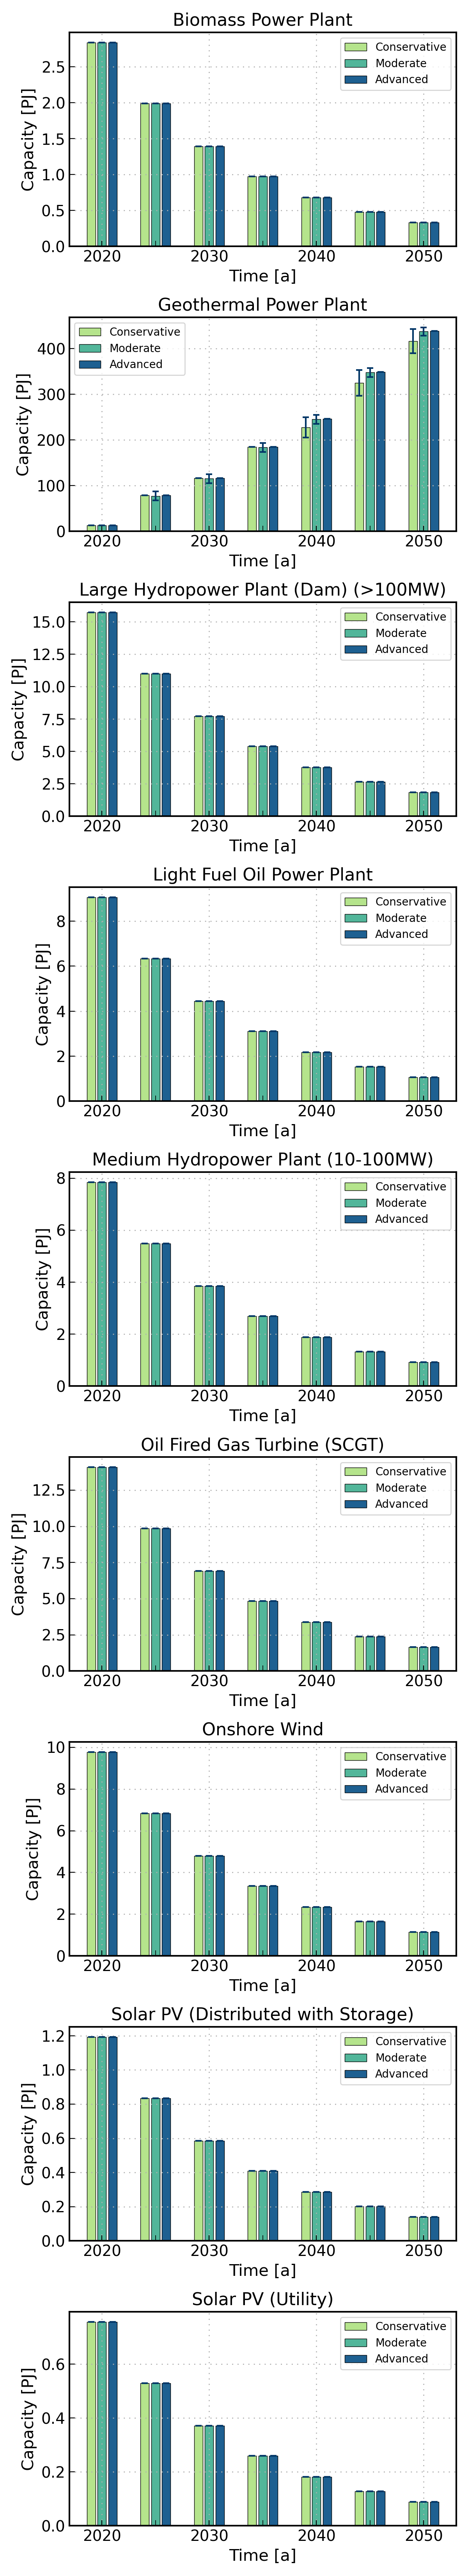

Biomass Power Plant
Geothermal Power Plant
Large Hydropower Plant (Dam) (>100MW)
Light Fuel Oil Power Plant
Medium Hydropower Plant (10-100MW)
Oil Fired Gas Turbine (SCGT)
Onshore Wind
Solar PV (Distributed with Storage)
Solar PV (Utility)


<IPython.core.display.Javascript object>

In [174]:
us_scenarios = ["Conservative", "Moderate", "Advanced"]
technologies = scenarios["Moderate_0"].capacity_results.technology.unique().tolist()
years = np.asarray(scenarios["Moderate_0"].capacity_results.year.unique().tolist())

# initialise plot
fig, ax = plt.subplots(len(technologies), 1, figsize=(6, 33))

# width of bars
width = 1

color_dict = {"Conservative": "#b5e48c", "Moderate": "#52b69a", "Advanced": "#1e6091"}
color_dict_errorbar = {
    "Conservative": "#003566",
    "Moderate": "#003566",
    "Advanced": "#003566",
}

# loop over technologies
for count_tech, tech in enumerate(technologies):
    print(tech)
    # loop over scenarios
    results_per_tech_per_scenario = {}
    for count_scenarios, us_scenario in enumerate(us_scenarios):
        # get all results for this us_scenario

        results_us_scenario = np.asarray(
            [
                results.capacity_results[results.capacity_results.technology == tech]
                .groupby("year")
                .capacity.sum()
                .tolist()
                for name, results in scenarios.items()
                if us_scenario in name
            ]
        )

        results_per_tech_per_scenario[us_scenario] = np.asarray(
            [np.mean(results_us_scenario, axis=0), np.std(results_us_scenario, axis=0)]
        )

        ax[count_tech].bar(
            years - 1 + count_scenarios * width,
            np.mean(results_us_scenario, axis=0),
            # yerr=np.std(results_us_scenario, axis=0),
            color=color_dict[us_scenario],
            label=us_scenario,
            ec="k",
            lw=0.5,
        )

        ax[count_tech].errorbar(
            years - 1 + count_scenarios * width,
            np.mean(results_us_scenario, axis=0),
            yerr=np.std(results_us_scenario, axis=0),
            ls="",
            capsize=3,
            color=color_dict_errorbar[us_scenario],
            capthick=1.5,
        )

    # layout
    ax[count_tech].set_title(tech)
    ax[count_tech].set_xlabel("Time [a]")
    ax[count_tech].set_ylabel("Capacity [PJ]")
    ax[count_tech].grid(which="major", ls="dashed", dashes=(1, 4), lw=1.0, zorder=0)
    ax[count_tech].tick_params(direction="in", which="minor", length=5)
    ax[count_tech].tick_params(direction="in", which="major", length=5)
    ax[count_tech].xaxis.set_major_locator(MultipleLocator(10))
    ax[count_tech].xaxis.set_minor_locator(MultipleLocator(5))
    ax[count_tech].legend(frameon=True, loc="best")

plt.legend()
plt.tight_layout()

### Saving the figure

In [175]:
plt.savefig("scenarios_X.png", bbox_inches="tight", dpi=600)

<IPython.core.display.Javascript object>